In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [45]:
df=pd.read_csv('/content/musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6598.0,3299.500000,1904.822870,1.0,1650.25,3299.5,4948.75,6598.0
f1,6598.0,58.945135,53.249007,-31.0,37.00,44.0,53.00,292.0
f2,6598.0,-119.128524,90.813375,-199.0,-193.00,-149.0,-95.00,95.0
f3,6598.0,-73.146560,67.956235,-167.0,-137.00,-99.0,-19.00,81.0
f4,6598.0,-0.628372,80.444617,-114.0,-70.00,-25.0,42.00,161.0
...,...,...,...,...,...,...,...,...
f163,6598.0,201.760230,59.526751,73.0,166.00,191.0,215.00,625.0
f164,6598.0,-47.488330,55.069365,-289.0,-68.00,-60.0,-45.00,295.0
f165,6598.0,-150.259927,76.019023,-428.0,-179.00,-150.0,-120.00,168.0
f166,6598.0,41.770233,94.116085,-471.0,-9.00,27.0,119.00,367.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [48]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [49]:
df.drop(['ID','molecule_name','conformation_name'],axis=1,inplace=True)

In [50]:
df1=df['class']
df.drop('class',axis=1,inplace=True)

In [51]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [52]:
train_x,test_x,train_y,test_y=train_test_split(df,df1,test_size=0.2,random_state=0)

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,input_shape=(train_x.shape[-1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics = ['accuracy'])



In [67]:
history = model.fit(train_x, train_y,batch_size=16, epochs=10, 
                    validation_data=(test_x, test_y))


Epoch 1/10
330/330 [==============================] - 1s 3ms/step - loss: 10.3444 - accuracy: 0.7493 - val_loss: 0.5862 - val_accuracy: 0.7152
Epoch 2/10
330/330 [==============================] - 1s 2ms/step - loss: 1.6834 - accuracy: 0.7654 - val_loss: 0.5588 - val_accuracy: 0.5280
Epoch 3/10
330/330 [==============================] - 1s 2ms/step - loss: 0.8047 - accuracy: 0.7922 - val_loss: 0.5253 - val_accuracy: 0.8477
Epoch 4/10
330/330 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.8295 - val_loss: 0.4697 - val_accuracy: 0.8485
Epoch 5/10
330/330 [==============================] - 1s 2ms/step - loss: 0.5281 - accuracy: 0.8316 - val_loss: 0.4640 - val_accuracy: 0.8485
Epoch 6/10
330/330 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.8372 - val_loss: 0.4368 - val_accuracy: 0.8485
Epoch 7/10
330/330 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8399 - val_loss: 0.4061 - val_accuracy: 0.8485
Epoch

In [68]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)


42/42 - 0s - loss: 0.3859 - accuracy: 0.8485

Test accuracy: 0.8484848737716675


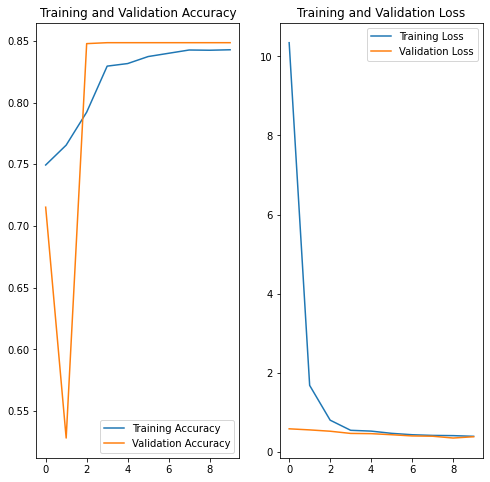

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
model1=LogisticRegression()
model.fit(train_x,train_y)
o=model.predict(test_x)
o=np.argmax(o,axis=1)
print(confusion_matrix(test_y,o))


165/165 [==============================] - 0s 2ms/step - loss: 1.8453e-08 - accuracy: 0.3712
[[1120    0]
 [ 200    0]]
